In [606]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

# MAKE SOME PLOTS

## No. 1: Number of participants

In [607]:
with open("./num_participants_results.json", 'r') as j:
     num_participants_json = json.loads(j.read())

In [608]:
num_participants_df = pd.DataFrame(num_participants_json)

In [609]:
num_participants_df

,comp_time_sharing,comp_time_processing,comp_time_reconstruction,bytes_received_smc_party,bytes_sent_smc_party,runtime_overall,bytes_sent_ttp,comp_time_ttp,num_parties,iteration
0,0.000081,0.008568,0.000019,1145.40,534.40,0.055992,224,0.018892,5,0
1,0.000143,0.007756,0.000012,1145.80,536.20,0.042711,225,0.019178,5,1
2,0.000070,0.010865,0.000087,1143.80,535.00,0.037587,224,0.013637,5,2
3,0.000072,3.689706,0.000005,1141.80,533.80,3.732151,224,0.015756,5,3
4,0.000131,0.008085,0.000007,1141.60,533.80,0.042944,222,0.003224,5,4
...,...,...,...,...,...,...,...,...,...,...
175,0.004719,0.250098,0.000296,22966.63,7789.35,0.495034,4503,19.125047,100,25
176,0.004485,0.109033,0.000298,22946.81,7788.79,0.533638,4523,0.062813,100,26
177,0.004230,0.067511,0.000405,22943.92,7788.34,0.314260,4505,0.096502,100,27
178,0.005784,0.075482,0.000323,22940.97,7788.28,1.379813,4518,0.142438,100,28


In [610]:
display(num_participants_df.dtypes)

comp_time_sharing           float64
comp_time_processing        float64
comp_time_reconstruction    float64
bytes_received_smc_party    float64
bytes_sent_smc_party        float64
runtime_overall             float64
bytes_sent_ttp                int64
comp_time_ttp               float64
num_parties                   int64
iteration                     int64
dtype: object

In [611]:
comp_cost_num_parts_df_one = num_participants_df[['comp_time_sharing', 'num_parties']]
comp_cost_num_parts_df_one.rename(columns = {'comp_time_sharing':'time_taken'}, inplace = True)
comp_cost_num_parts_df_one['Kind'] = pd.Series(['SMC Parties: Secret Sharing' for x in range(len(comp_cost_num_parts_df_one.index))])

comp_cost_num_parts_df_two = num_participants_df[['comp_time_reconstruction', 'num_parties']]
comp_cost_num_parts_df_two.rename(columns = {'comp_time_reconstruction':'time_taken'}, inplace = True)
comp_cost_num_parts_df_two['Kind'] = pd.Series(['SMC Parties: Reconstruction' for x in range(len(comp_cost_num_parts_df_two.index))])

comp_cost_num_parts_df_three = num_participants_df[['runtime_overall', 'num_parties']]
comp_cost_num_parts_df_three.rename(columns = {'runtime_overall':'time_taken'}, inplace = True)
comp_cost_num_parts_df_three['Kind'] = pd.Series(['SMC Parties: Overall' for x in range(len(comp_cost_num_parts_df_three.index))])

comp_cost_num_parts_df_four = num_participants_df[['comp_time_ttp', 'num_parties']]
comp_cost_num_parts_df_four.rename(columns = {'comp_time_ttp':'time_taken'}, inplace = True)
comp_cost_num_parts_df_four['Kind'] = pd.Series(['TTP' for x in range(len(comp_cost_num_parts_df_four.index))])

comp_cost_num_parts_df_five = num_participants_df[['comp_time_processing', 'num_parties']]
comp_cost_num_parts_df_five.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
comp_cost_num_parts_df_five['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_num_parts_df_five.index))])


/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4154292481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_num_parts_df_one.rename(columns = {'comp_time_sharing':'time_taken'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4154292481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_num_parts_df_one['Kind'] = pd.Series(['SMC Parties: Secret Sharing' for x in range(len(comp_cost_num_parts_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4154292481.py:6: Sett

In [612]:
num_parties_comp_cost_df = pd.concat([comp_cost_num_parts_df_one, comp_cost_num_parts_df_two, comp_cost_num_parts_df_three, comp_cost_num_parts_df_five], axis=0)
#num_parties_comp_cost_df = pd.concat([comp_cost_num_parts_df_one, comp_cost_num_parts_df_two, comp_cost_num_parts_df_three], axis=0)

/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categoric

<Figure size 432x360 with 0 Axes>

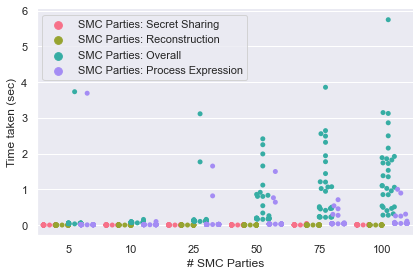

In [613]:
plt.clf()

#sns.set(rc={"figure.figsize":(6, 5)})

ax = sns.catplot(x="num_parties", y="time_taken", hue="Kind",
               data=num_parties_comp_cost_df, kind="swarm", palette="husl", dodge = True, legend=False, height=4, aspect=1.5)

#specfiy axis labels
ax.set(xlabel='# SMC Parties',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_num_parties_smc.pdf")

<Figure size 432x360 with 0 Axes>

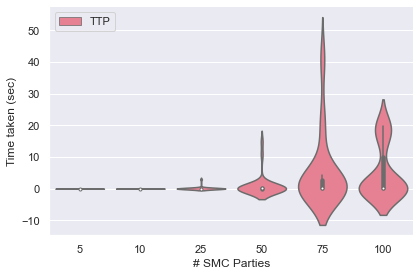

In [614]:
plt.clf()

ax = sns.catplot(x="num_parties", y="time_taken", hue="Kind",
               data=comp_cost_num_parts_df_four, kind="violin", palette="husl", legend=False, height=4, aspect=1.5)

#specfiy axis labels
ax.set(xlabel='# SMC Parties',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_num_parties_ttp.pdf")

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4249355303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_num_parties_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4249355303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_num_parties_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_num_parties_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4249355303.py:7: Set

<Figure size 432x360 with 0 Axes>

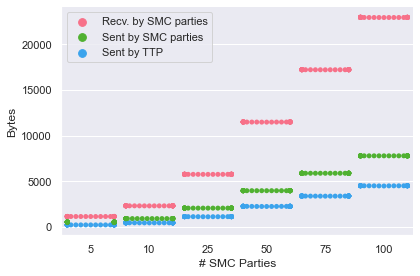

In [615]:
comm_cost_num_parties_df_one = num_participants_df[['bytes_received_smc_party', 'num_parties']]
comm_cost_num_parties_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
comm_cost_num_parties_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_num_parties_df_one.index))])
# comm_cost_secret_additions_df_one

comm_cost_num_parties_df_two = num_participants_df[['bytes_sent_smc_party', 'num_parties']]
comm_cost_num_parties_df_two.rename(columns = {'bytes_sent_smc_party':'bytes'}, inplace = True)
comm_cost_num_parties_df_two['Kind'] = pd.Series(['Sent by SMC parties' for x in range(len(comm_cost_num_parties_df_two.index))])

comm_cost_num_parties_df_three = num_participants_df[['bytes_sent_ttp', 'num_parties']]
comm_cost_num_parties_df_three.rename(columns = {'bytes_sent_ttp':'bytes'}, inplace = True)
comm_cost_num_parties_df_three['Kind'] = pd.Series(['Sent by TTP' for x in range(len(comm_cost_num_parties_df_three.index))])


comm_cost_num_parties_df = pd.concat([comm_cost_num_parties_df_one, comm_cost_num_parties_df_two, comm_cost_num_parties_df_three], axis=0)


plt.clf()

ax = sns.catplot(x="num_parties", y="bytes", hue="Kind",
               data=comm_cost_num_parties_df, kind="swarm", palette="husl", legend=False, height=4, aspect=1.5)

#specfiy axis labels
ax.set(xlabel='# SMC Parties',
       ylabel='Bytes')

plt.legend(loc='upper left')

ax.figure.savefig("comm_cost_num_parties.pdf")

## No. 2: Number of secret additions

In [616]:
with open("./num_secret_additions_results.json", 'r') as j:
     num_secret_additions_json = json.loads(j.read())

In [617]:
num_secret_additions_df = pd.DataFrame(num_secret_additions_json)

In [618]:
# IDEA: plot all comp. time metrics (here: runtime_overall, comp_time_processing - ttp is of no relevance, so not including its comp. time;
#       comp_time_sharing and comp_time_reconstruction not interesting because number of participants constant) in ONE plot

comp_cost_secret_additions_df_one = num_secret_additions_df[['comp_time_processing', 'num_secret_additions']]
comp_cost_secret_additions_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
comp_cost_secret_additions_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_secret_additions_df_one.index))])
comp_cost_secret_additions_df_one

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4294549936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_secret_additions_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4294549936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_secret_additions_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_secret_additions_df_one.index))])


,time_taken,num_secret_additions,Kind
0,0.010427,10,SMC Parties: Process Expression
1,0.011174,10,SMC Parties: Process Expression
2,0.020549,10,SMC Parties: Process Expression
3,0.014630,10,SMC Parties: Process Expression
4,0.018509,10,SMC Parties: Process Expression
...,...,...,...
115,11.324751,1000,SMC Parties: Process Expression
116,3.720951,1000,SMC Parties: Process Expression
117,3.761887,1000,SMC Parties: Process Expression
118,7.196723,1000,SMC Parties: Process Expression


In [619]:
comp_cost_secret_additions_df_two = num_secret_additions_df[['runtime_overall', 'num_secret_additions']]
comp_cost_secret_additions_df_two.rename(columns = {'runtime_overall':'time_taken'}, inplace = True)
comp_cost_secret_additions_df_two['Kind'] = pd.Series(['SMC Parties: Overall' for x in range(len(comp_cost_secret_additions_df_two.index))])
comp_cost_secret_additions_df_two

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4225663730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_secret_additions_df_two.rename(columns = {'runtime_overall':'time_taken'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4225663730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_secret_additions_df_two['Kind'] = pd.Series(['SMC Parties: Overall' for x in range(len(comp_cost_secret_additions_df_two.index))])


,time_taken,num_secret_additions,Kind
0,0.025737,10,SMC Parties: Overall
1,0.031207,10,SMC Parties: Overall
2,0.040048,10,SMC Parties: Overall
3,0.040140,10,SMC Parties: Overall
4,0.046900,10,SMC Parties: Overall
...,...,...,...
115,11.339977,1000,SMC Parties: Overall
116,3.767611,1000,SMC Parties: Overall
117,3.815091,1000,SMC Parties: Overall
118,7.227379,1000,SMC Parties: Overall


In [620]:
num_secret_additions_comp_cost_df = pd.concat([comp_cost_secret_additions_df_one, comp_cost_secret_additions_df_two], axis=0)

In [621]:
num_secret_additions_comp_cost_df
import numpy
numpy.any(num_secret_additions_comp_cost_df['time_taken'] < 0)

False

<Figure size 432x360 with 0 Axes>

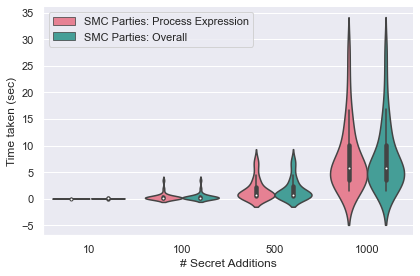

In [622]:
plt.clf()

ax = sns.catplot(x="num_secret_additions", y="time_taken", hue="Kind",
               data=num_secret_additions_comp_cost_df, kind="violin", palette="husl", height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Secret Additions',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_secret_additions.pdf")

In [623]:
ax.figure.savefig("comp_cost_secret_additions.pdf")

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/1514778387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_secret_additions_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/1514778387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_secret_additions_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_secret_additions_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/15147

<Figure size 432x360 with 0 Axes>

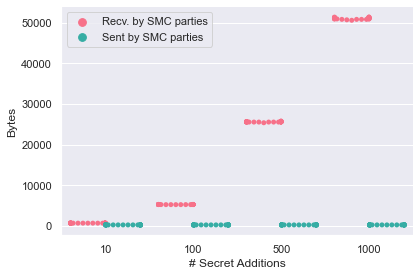

In [624]:
# IDEA: plot all comm. cost metrics (here: bytes_received_smc_party, bytes_sent_smc_party as ttp not involved - no multiplication) in ONE plot

comm_cost_secret_additions_df_one = num_secret_additions_df[['bytes_received_smc_party', 'num_secret_additions']]
comm_cost_secret_additions_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
comm_cost_secret_additions_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_secret_additions_df_one.index))])
# comm_cost_secret_additions_df_one

comm_cost_secret_additions_df_two = num_secret_additions_df[['bytes_sent_smc_party', 'num_secret_additions']]
comm_cost_secret_additions_df_two.rename(columns = {'bytes_sent_smc_party':'bytes'}, inplace = True)
comm_cost_secret_additions_df_two['Kind'] = pd.Series(['Sent by SMC parties' for x in range(len(comm_cost_secret_additions_df_two.index))])

num_secret_additions_comm_cost_df = pd.concat([comm_cost_secret_additions_df_one, comm_cost_secret_additions_df_two], axis=0)


plt.clf()

ax = sns.catplot(x="num_secret_additions", y="bytes", hue="Kind",
               data=num_secret_additions_comm_cost_df, kind="swarm", palette="husl", dodge=True, height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Secret Additions',
       ylabel='Bytes')

plt.legend(loc='upper left')

ax.figure.savefig("comm_cost_secret_additions.pdf")


In [625]:
num_secret_additions_df

,comp_time_sharing,comp_time_processing,comp_time_reconstruction,bytes_received_smc_party,bytes_sent_smc_party,runtime_overall,bytes_sent_ttp,comp_time_ttp,num_secret_additions,iteration
0,0.000104,0.010427,0.000077,661.666667,229.000000,0.025737,0,0,10,0
1,0.000227,0.011174,0.000008,659.333333,228.333333,0.031207,0,0,10,1
2,0.000091,0.020549,0.000013,663.333333,229.666667,0.040048,0,0,10,2
3,0.000171,0.014630,0.000006,661.666667,229.000000,0.040140,0,0,10,3
4,0.000149,0.018509,0.000009,661.666667,229.000000,0.046900,0,0,10,4
...,...,...,...,...,...,...,...,...,...,...
115,0.001367,11.324751,0.000010,50932.333333,229.333333,11.339977,0,0,1000,25
116,0.000127,3.720951,0.000007,51374.666667,230.000000,3.767611,0,0,1000,26
117,0.000171,3.761887,0.000010,50931.333333,229.000000,3.815091,0,0,1000,27
118,0.000141,7.196723,0.000011,50818.666667,228.333333,7.227379,0,0,1000,28


## No. 3: Number of scalar additions

In [626]:
with open("./num_scalar_additions_results.json", 'r') as j:
     num_scalar_additions_json = json.loads(j.read())

In [627]:
num_scalar_additions_df = pd.DataFrame(num_scalar_additions_json)

In [628]:
num_scalar_additions_df

,comp_time_sharing,comp_time_processing,comp_time_reconstruction,bytes_received_smc_party,bytes_sent_smc_party,runtime_overall,bytes_sent_ttp,comp_time_ttp,num_scalar_additions,iteration
0,0.000113,0.006956,0.000004,142.000000,223.333333,0.031212,0,0,10,0
1,0.000069,0.005645,0.000004,141.333333,223.000000,0.028075,0,0,10,1
2,0.000128,0.004698,0.000110,142.000000,224.333333,0.037492,0,0,10,2
3,0.000172,0.009819,0.000008,142.000000,224.000000,0.033601,0,0,10,3
4,0.002815,0.007462,0.000008,141.333333,223.666667,0.033926,0,0,10,4
...,...,...,...,...,...,...,...,...,...,...
115,0.000076,0.249623,0.000004,141.333333,223.000000,0.272180,0,0,1000,25
116,0.000075,0.195379,0.000007,142.000000,223.666667,0.214417,0,0,1000,26
117,0.000115,1.340978,0.000046,142.000000,223.333333,1.360537,0,0,1000,27
118,0.000102,0.194073,0.000004,140.666667,223.333333,0.213022,0,0,1000,28


In [629]:
comp_cost_scalar_additions_df_one = num_scalar_additions_df[['comp_time_processing', 'num_scalar_additions']]
comp_cost_scalar_additions_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
comp_cost_scalar_additions_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_scalar_additions_df_one.index))])

comp_cost_scalar_additions_df_two = num_scalar_additions_df[['runtime_overall', 'num_scalar_additions']]
comp_cost_scalar_additions_df_two.rename(columns = {'runtime_overall':'time_taken'}, inplace = True)
comp_cost_scalar_additions_df_two['Kind'] = pd.Series(['SMC Parties: Overall' for x in range(len(comp_cost_scalar_additions_df_two.index))])

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/3503336356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_scalar_additions_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/3503336356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_scalar_additions_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_scalar_additions_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykerne

In [630]:
num_scalar_additions_comp_cost_df = pd.concat([comp_cost_scalar_additions_df_one, comp_cost_scalar_additions_df_two], axis=0)

<Figure size 432x360 with 0 Axes>

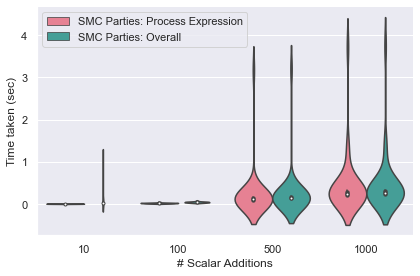

In [631]:
plt.clf()

ax = sns.catplot(x="num_scalar_additions", y="time_taken", hue="Kind",
               data=num_scalar_additions_comp_cost_df, kind="violin", palette="husl", height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Scalar Additions',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_scalar_additions.pdf")

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/3625131491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_scalar_additions_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/3625131491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_scalar_additions_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_scalar_additions_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/36251

<Figure size 432x360 with 0 Axes>

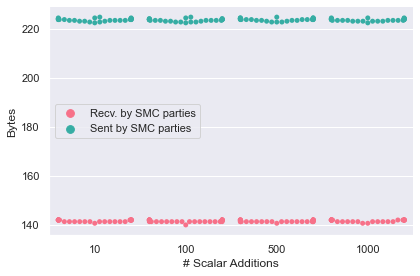

In [632]:
# IDEA: plot all comm. cost metrics (here: bytes_received_smc_party, bytes_sent_smc_party as ttp not involved - no multiplication) in ONE plot

comm_cost_scalar_additions_df_one = num_scalar_additions_df[['bytes_received_smc_party', 'num_scalar_additions']]
comm_cost_scalar_additions_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
comm_cost_scalar_additions_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_scalar_additions_df_one.index))])
# comm_cost_secret_additions_df_one

comm_cost_scalar_additions_df_two = num_scalar_additions_df[['bytes_sent_smc_party', 'num_scalar_additions']]
comm_cost_scalar_additions_df_two.rename(columns = {'bytes_sent_smc_party':'bytes'}, inplace = True)
comm_cost_scalar_additions_df_two['Kind'] = pd.Series(['Sent by SMC parties' for x in range(len(comm_cost_scalar_additions_df_two.index))])

num_scalar_additions_comm_cost_df = pd.concat([comm_cost_scalar_additions_df_one, comm_cost_scalar_additions_df_two], axis=0)


plt.clf()

ax = sns.catplot(x="num_scalar_additions", y="bytes", hue="Kind",
               data=num_scalar_additions_comm_cost_df, kind="swarm", palette="husl", height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Scalar Additions',
       ylabel='Bytes')

plt.legend(loc='center left')

ax.figure.savefig("comm_cost_scalar_additions.pdf")

## No. 4: Number of secret multiplications

In [633]:
with open("./num_secret_multiplications_results.json", 'r') as j:
     num_secret_multiplications_json = json.loads(j.read())

In [634]:
num_secret_multiplications_df = pd.DataFrame(num_secret_multiplications_json)

In [635]:
num_secret_multiplications_df

,comp_time_sharing,comp_time_processing,comp_time_reconstruction,bytes_received_smc_party,bytes_sent_smc_party,runtime_overall,bytes_sent_ttp,comp_time_ttp,num_secret_multiplications,iteration
0,0.000146,0.051109,0.000006,3827.333333,1603.000000,0.069618,1251,0.000880,10,0
1,0.000153,0.056377,0.000154,3815.000000,1604.666667,0.079260,1206,0.008745,10,1
2,0.000199,0.054460,0.000007,3806.000000,1602.000000,0.082280,1197,0.000288,10,2
3,0.000081,3.454134,0.000014,3814.000000,1603.000000,3.487247,1215,0.006911,10,3
4,0.000220,0.050960,0.000006,3815.333333,1603.666667,0.077492,1215,0.002980,10,4
...,...,...,...,...,...,...,...,...,...,...
115,0.000228,22.730214,0.000016,402032.666667,153191.000000,22.784282,135864,0.010167,1000,25
116,0.000071,21.320843,0.000020,400392.333333,152649.333333,21.349045,132867,0.017878,1000,26
117,0.002752,15.184910,0.000010,401545.666667,152781.666667,15.205168,135864,0.002075,1000,27
118,0.000077,17.409861,0.000015,401383.000000,152755.666667,17.437478,135864,0.012632,1000,28


In [636]:
comp_cost_secret_multiplications_df_one = num_secret_multiplications_df[['comp_time_processing', 'num_secret_multiplications']]
comp_cost_secret_multiplications_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
comp_cost_secret_multiplications_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_secret_multiplications_df_one.index))])

comp_cost_secret_multiplications_df_two = num_secret_multiplications_df[['runtime_overall', 'num_secret_multiplications']]
comp_cost_secret_multiplications_df_two.rename(columns = {'runtime_overall':'time_taken'}, inplace = True)
comp_cost_secret_multiplications_df_two['Kind'] = pd.Series(['SMC parties: Overall' for x in range(len(comp_cost_secret_multiplications_df_two.index))])

comp_cost_secret_multiplications_df_three = num_secret_multiplications_df[['comp_time_ttp', 'num_secret_multiplications']]
comp_cost_secret_multiplications_df_three.rename(columns = {'comp_time_ttp':'time_taken'}, inplace = True)
comp_cost_secret_multiplications_df_three['Kind'] = pd.Series(['TTP' for x in range(len(comp_cost_secret_multiplications_df_three.index))])

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/3277684628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_secret_multiplications_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/3277684628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_secret_multiplications_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_secret_multiplications_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4k

In [637]:
num_secret_mults_comp_cost_df_smc = pd.concat([comp_cost_secret_multiplications_df_one, comp_cost_secret_multiplications_df_two], axis=0)

/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x360 with 0 Axes>

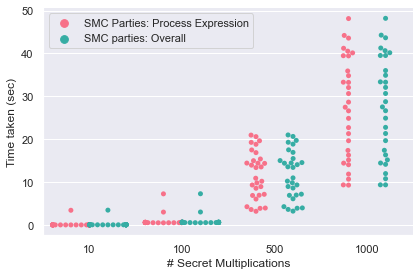

In [638]:
plt.clf()

ax = sns.catplot(x="num_secret_multiplications", y="time_taken", hue="Kind",
               data=num_secret_mults_comp_cost_df_smc, kind="swarm", palette="husl", dodge=True, height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Secret Multiplications',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_secret_multiplications_smc.pdf")

/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/theresatratzmuller/Documents/Code.nosync/ss22/smcompiler_girls/smcomp_venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x360 with 0 Axes>

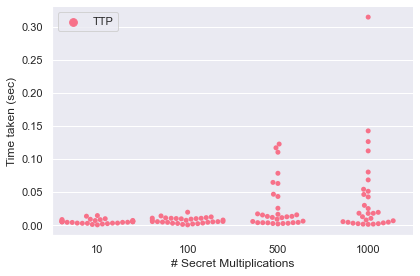

In [639]:
plt.clf()

ax = sns.catplot(x="num_secret_multiplications", y="time_taken", hue="Kind",
               data=comp_cost_secret_multiplications_df_three, kind="swarm", palette="husl", dodge=True, height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Secret Multiplications',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_secret_multiplications_ttp.pdf")

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/1948932025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_secret_mults_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/1948932025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_secret_mults_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_secret_mults_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/1948932025.py:9: 

<Figure size 432x360 with 0 Axes>

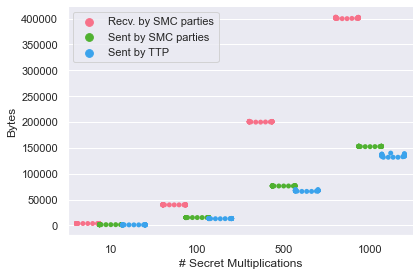

In [640]:
# IDEA: plot all comm. cost metrics (here: bytes_received_smc_party, bytes_sent_smc_party as ttp not involved - no multiplication) in ONE plot

comm_cost_secret_mults_df_one = num_secret_multiplications_df[['bytes_received_smc_party', 'num_secret_multiplications']]
comm_cost_secret_mults_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
comm_cost_secret_mults_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_secret_mults_df_one.index))])
# comm_cost_secret_additions_df_one

comm_cost_secret_mults_df_two = num_secret_multiplications_df[['bytes_sent_smc_party', 'num_secret_multiplications']]
comm_cost_secret_mults_df_two.rename(columns = {'bytes_sent_smc_party':'bytes'}, inplace = True)
comm_cost_secret_mults_df_two['Kind'] = pd.Series(['Sent by SMC parties' for x in range(len(comm_cost_secret_mults_df_two.index))])


comm_cost_secret_mults_df_three = num_secret_multiplications_df[['bytes_sent_ttp', 'num_secret_multiplications']]
comm_cost_secret_mults_df_three.rename(columns = {'bytes_sent_ttp':'bytes'}, inplace = True)
comm_cost_secret_mults_df_three['Kind'] = pd.Series(['Sent by TTP' for x in range(len(comm_cost_secret_mults_df_three.index))])

num_secret_mults_comm_cost_df = pd.concat([comm_cost_secret_mults_df_one, comm_cost_secret_mults_df_two, comm_cost_secret_mults_df_three], axis=0)


plt.clf()

ax = sns.catplot(x="num_secret_multiplications", y="bytes", hue="Kind",
               data=num_secret_mults_comm_cost_df, kind="swarm", palette="husl", dodge=True, height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Secret Multiplications',
       ylabel='Bytes')

plt.legend(loc='upper left')

ax.figure.savefig("comm_cost_secret_multiplications.pdf")

## No. 5: Number of scalar multiplications

In [641]:
with open("./num_scalar_multiplications_results.json", 'r') as j:
     num_scalar_multiplications_json = json.loads(j.read())

In [642]:
num_scalar_multiplications_df = pd.DataFrame(num_scalar_multiplications_json)

In [643]:
num_scalar_multiplications_df

,comp_time_sharing,comp_time_processing,comp_time_reconstruction,bytes_received_smc_party,bytes_sent_smc_party,runtime_overall,bytes_sent_ttp,comp_time_ttp,num_scalar_multiplications,iteration
0,0.000076,0.001862,0.000008,141.333333,223.666667,0.019708,0,0,10,0
1,0.000071,0.003036,0.000007,142.000000,223.666667,0.019728,0,0,10,1
2,0.000258,0.002114,0.000005,141.333333,223.000000,0.027486,0,0,10,2
3,0.000088,0.001014,0.000009,141.333333,223.333333,0.031244,0,0,10,3
4,0.000084,0.000922,0.000011,140.666667,223.666667,0.022224,0,0,10,4
...,...,...,...,...,...,...,...,...,...,...
115,0.003459,1.030288,0.000005,141.333333,223.666667,1.060683,0,0,1000,25
116,0.000189,0.979179,0.000005,142.000000,223.000000,1.017467,0,0,1000,26
117,0.000114,1.001579,0.000010,140.666667,223.000000,1.032628,0,0,1000,27
118,0.000092,0.905977,0.000008,142.000000,224.000000,0.922364,0,0,1000,28


In [644]:
comp_cost_scalar_mults_df_one = num_scalar_multiplications_df[['comp_time_processing', 'num_scalar_multiplications']]
comp_cost_scalar_mults_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
comp_cost_scalar_mults_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_scalar_mults_df_one.index))])

comp_cost_scalar_mults_df_two = num_scalar_multiplications_df[['runtime_overall', 'num_scalar_multiplications']]
comp_cost_scalar_mults_df_two.rename(columns = {'runtime_overall':'time_taken'}, inplace = True)
comp_cost_scalar_mults_df_two['Kind'] = pd.Series(['SMC Parties: Overall' for x in range(len(comp_cost_scalar_mults_df_two.index))])

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/406311765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_scalar_mults_df_one.rename(columns = {'comp_time_processing':'time_taken'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/406311765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_cost_scalar_mults_df_one['Kind'] = pd.Series(['SMC Parties: Process Expression' for x in range(len(comp_cost_scalar_mults_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4063117

In [645]:
num_scalar_mults_comp_cost_df = pd.concat([comp_cost_scalar_mults_df_one, comp_cost_scalar_mults_df_two], axis=0)

<Figure size 432x360 with 0 Axes>

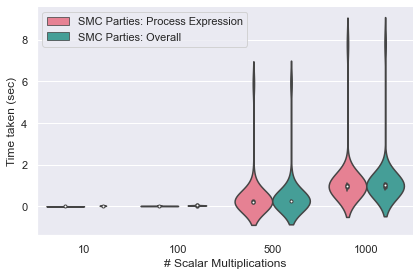

In [646]:
plt.clf()

ax = sns.catplot(x="num_scalar_multiplications", y="time_taken", hue="Kind",
               data=num_scalar_mults_comp_cost_df, kind="violin", palette="husl", height=4, aspect=1.5, legend=False)

#specfiy axis labels
ax.set(xlabel='# Scalar Multiplications',
       ylabel='Time taken (sec)')

plt.legend(loc='upper left')

ax.figure.savefig("comp_cost_scalar_multiplications.pdf")

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4199022295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_scalar_mults_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4199022295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_cost_scalar_mults_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_scalar_mults_df_one.index))])
/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_4385/4199022295.py:9: 

<Figure size 432x360 with 0 Axes>

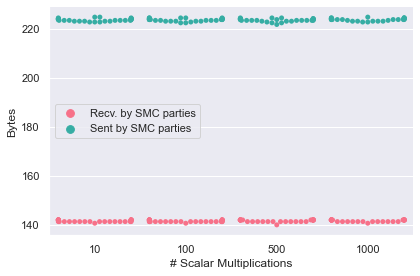

In [647]:
# IDEA: plot all comm. cost metrics (here: bytes_received_smc_party, bytes_sent_smc_party as ttp not involved - no multiplication) in ONE plot

comm_cost_scalar_mults_df_one = num_scalar_multiplications_df[['bytes_received_smc_party', 'num_scalar_multiplications']]
comm_cost_scalar_mults_df_one.rename(columns = {'bytes_received_smc_party':'bytes'}, inplace = True)
comm_cost_scalar_mults_df_one['Kind'] = pd.Series(['Recv. by SMC parties' for x in range(len(comm_cost_scalar_mults_df_one.index))])
# comm_cost_secret_additions_df_one

comm_cost_scalar_mults_df_two = num_scalar_multiplications_df[['bytes_sent_smc_party', 'num_scalar_multiplications']]
comm_cost_scalar_mults_df_two.rename(columns = {'bytes_sent_smc_party':'bytes'}, inplace = True)
comm_cost_scalar_mults_df_two['Kind'] = pd.Series(['Sent by SMC parties' for x in range(len(comm_cost_scalar_mults_df_two.index))])

num_scalar_mults_comm_cost_df = pd.concat([comm_cost_scalar_mults_df_one, comm_cost_scalar_mults_df_two], axis=0)


plt.clf()

ax = sns.catplot(x="num_scalar_multiplications", y="bytes", hue="Kind",
               data=num_scalar_mults_comm_cost_df, kind="swarm", palette="husl", height=4, aspect=1.5,legend=False)

#specfiy axis labels
ax.set(xlabel='# Scalar Multiplications',
       ylabel='Bytes')

plt.legend(loc='center left')

ax.figure.savefig("comm_cost_scalar_multiplications.pdf")